#📌 Extracão

In [66]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

url = '/content/telco_customer_churn.csv'
df = pd.read_csv(url)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#🔧 Transformação

In [67]:
# Normalizando os dados
df_normalizado = df.copy()
df_normalizado.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [68]:
# Renomeando as colunas
df_normalizado.rename(columns={
    'customerID': 'Cliente_ID',
    'gender': 'Gênero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Companheiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_de_Contrato',
    'PhoneService': 'Telefone_Ativo',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Forma_Pagamento',
    'MonthlyCharges': 'Valor_Mensal',
    'TotalCharges': 'Valor_Total',
    'Churn': 'Cancelamento' # Added this line to rename 'Churn' to 'Cancelamento'
}, inplace=True)

df_normalizado.head()

,Cliente_ID,Gênero,Idoso,Tem_Companheiro,Tem_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,Cancelamento
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
# Identificando identificando valores vazios no Cancelamento
df_normalizado['Cancelamento'] = df_normalizado['Cancelamento'].replace(r'^\s*$', np.nan, regex=True)

In [70]:
# Identificando os valores NAN no Cancelamento e sobstituindo por NO
df_normalizado['Cancelamento'] = df_normalizado['Cancelamento'].fillna('No')

In [71]:
# Verificar os valores únicos em cada coluna
for coluna in df_normalizado.columns:
    valores_unicos = df_normalizado[coluna].unique()
    print(f'Valores únicos na coluna {coluna}:')
    print(valores_unicos)
    print('\n')

Valores únicos na coluna Cliente_ID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Valores únicos na coluna Gênero:
['Female' 'Male']


Valores únicos na coluna Idoso:
[0 1]


Valores únicos na coluna Tem_Companheiro:
['Yes' 'No']


Valores únicos na coluna Tem_Dependentes:
['No' 'Yes']


Valores únicos na coluna Meses_de_Contrato:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Valores únicos na coluna Telefone_Ativo:
['No' 'Yes']


Valores únicos na coluna Multiplas_Linhas:
['No phone service' 'No' 'Yes']


Valores únicos na coluna Tipo_Internet:
['DSL' 'Fiber optic' 'No']


Valores únicos na coluna Seguranca_Online:
['No' 'Yes' 'No internet service']


Valores únicos na coluna Backup_Online:
['Yes' 'No' 'No internet service']


Valores únicos na coluna Protecao_Dispos

In [72]:
import numpy as np

for col in df_normalizado.columns:
    if (df_normalizado[col].astype(str).str.strip() == '').any():
        print(f"Column '{col}' contains empty strings.")

df_normalizado['Valor_Total'] = pd.to_numeric(df_normalizado['Valor_Total'], errors='coerce')

colunas_binarias = [
    'Cancelamento',
    'Tem_Companheiro',
    'Tem_Dependentes',
    'Telefone_Ativo',
    'Multiplas_Linhas',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Fatura_Digital'
]

for col in colunas_binarias:
    df_normalizado[col] = np.where(df_normalizado[col].isin(['Yes', 'No phone service', 'No internet service']), 1, 0)

print(df_normalizado[colunas_binarias].dtypes)

Column 'Valor_Total' contains empty strings.
Cancelamento            int64
Tem_Companheiro         int64
Tem_Dependentes         int64
Telefone_Ativo          int64
Multiplas_Linhas        int64
Backup_Online           int64
Protecao_Dispositivo    int64
Suporte_Tecnico         int64
Streaming_TV            int64
Streaming_Filmes        int64
Fatura_Digital          int64
dtype: object


In [73]:
# Verificar tipos das colunas
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cliente_ID            7043 non-null   object 
 1   Gênero                7043 non-null   object 
 2   Idoso                 7043 non-null   int64  
 3   Tem_Companheiro       7043 non-null   int64  
 4   Tem_Dependentes       7043 non-null   int64  
 5   Meses_de_Contrato     7043 non-null   int64  
 6   Telefone_Ativo        7043 non-null   int64  
 7   Multiplas_Linhas      7043 non-null   int64  
 8   Tipo_Internet         7043 non-null   object 
 9   Seguranca_Online      7043 non-null   object 
 10  Backup_Online         7043 non-null   int64  
 11  Protecao_Dispositivo  7043 non-null   int64  
 12  Suporte_Tecnico       7043 non-null   int64  
 13  Streaming_TV          7043 non-null   int64  
 14  Streaming_Filmes      7043 non-null   int64  
 15  Tipo_Contrato        

In [74]:
# Verificando valores ausentes
df_normalizado.isnull().sum()

,0
Cliente_ID,0
Gênero,0
Idoso,0
Tem_Companheiro,0
Tem_Dependentes,0
Meses_de_Contrato,0
Telefone_Ativo,0
Multiplas_Linhas,0
Tipo_Internet,0
Seguranca_Online,0


In [75]:
# Vazios ou em branco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
Cliente_ID,0
Gênero,0
Idoso,0
Tem_Companheiro,0
Tem_Dependentes,0
Meses_de_Contrato,0
Telefone_Ativo,0
Multiplas_Linhas,0
Tipo_Internet,0
Seguranca_Online,0


In [76]:
# Duplicados
print("Numero de duplicados:", df_normalizado.duplicated().sum())

Numero de duplicados: 0


In [77]:
# Clientes duplicados
df_sem_duplicatas = df_normalizado.drop_duplicates(subset=['Cliente_ID'], keep='first')
df_sem_duplicatas

,Cliente_ID,Gênero,Idoso,Tem_Companheiro,Tem_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,Cancelamento
0,7590-VHVEG,Female,0,1,0,1,0,1,DSL,No,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,1,DSL,Yes,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,Yes,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,No,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,1,DSL,Yes,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,No,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


#📊 Carga e análise

In [78]:
# Análise para colunas numéricas
numerica = df_normalizado.describe().T

In [79]:
# Mediana
numerica['mediana'] = df_normalizado.median(numeric_only=True)

In [80]:
numerica

,count,mean,std,min,25%,50%,75%,max,mediana
Idoso,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00,0.000
Tem_Companheiro,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00,0.000
Tem_Dependentes,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00,0.000
Meses_de_Contrato,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00,29.000
Telefone_Ativo,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00,1.000
Multiplas_Linhas,7043.0,0.518671,0.499687,0.00,0.00,1.000,1.0000,1.00,1.000
Backup_Online,7043.0,0.561550,0.496232,0.00,0.00,1.000,1.0000,1.00,1.000
Protecao_Dispositivo,7043.0,0.560557,0.496355,0.00,0.00,1.000,1.0000,1.00,1.000
Suporte_Tecnico,7043.0,0.506886,0.499988,0.00,0.00,1.000,1.0000,1.00,1.000
Streaming_TV,7043.0,0.601022,0.489723,0.00,0.00,1.000,1.0000,1.00,1.000


In [81]:
# Análise de colunas não numéricas
nao_numerica = df_normalizado.describe(include='object').T

In [82]:
nao_numerica

,count,unique,top,freq
Cliente_ID,7043,7043,3186-AJIEK,1
Gênero,7043,2,Male,3555
Tipo_Internet,7043,3,Fiber optic,3096
Seguranca_Online,7043,3,No,3498
Tipo_Contrato,7043,3,Month-to-month,3875
Forma_Pagamento,7043,4,Electronic check,2365


In [83]:
# Quantos clientes cancelaram
contagem_cancelamento = df_normalizado['Cancelamento'].value_counts().reset_index()
contagem_cancelamento.columns = ['Cancelamento', 'Quantidade']
contagem_cancelamento

,Cancelamento,Quantidade
0,0,5174
1,1,1869


In [84]:
# Contagem de cancelamento por gênero
contagem_genero = df_normalizado['Gênero'].value_counts().reset_index()
contagem_genero.columns = ['Gênero', 'Quantidade']
contagem_genero

,Gênero,Quantidade
0,Male,3555
1,Female,3488


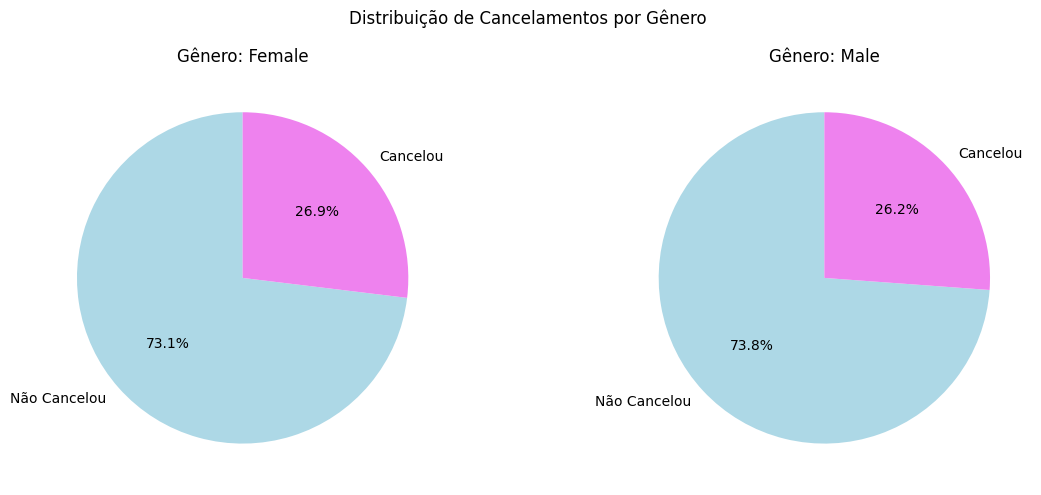

In [85]:
# Gráfico de pizza
genders = df_normalizado['Gênero'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(12, 5))

for i, gender in enumerate(genders):
    data = df_normalizado[df_normalizado['Gênero'] == gender]['Cancelamento'].value_counts()
    axes[i].pie(data, labels=['Não Cancelou', 'Cancelou'], autopct='%1.1f%%',
                colors=['lightblue', 'violet'], startangle=90)
    axes[i].set_title(f'Gênero: {gender}')

plt.suptitle('Distribuição de Cancelamentos por Gênero')
plt.tight_layout()
plt.show()

In [86]:
# Contagem de cancelamento por idade
contagem_idoso = df_normalizado['Idoso'].value_counts().reset_index()
contagem_idoso.columns = ['Idoso', 'Quantidade']


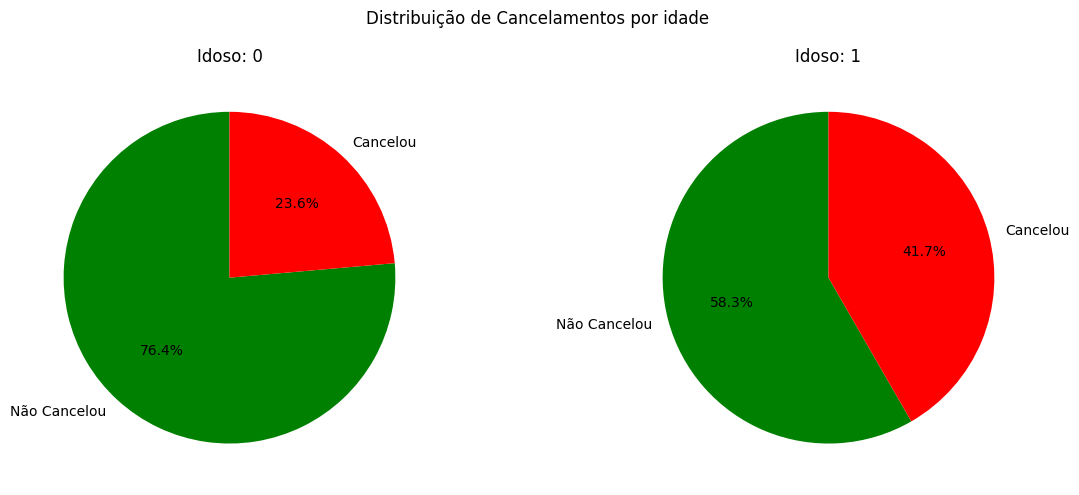

In [87]:
# Gráfico de pizza
idoso_values = df_normalizado['Idoso'].unique()

fig, axes = plt.subplots(1, len(idoso_values), figsize=(12, 5))

for i, idoso in enumerate(idoso_values):
    data = df_normalizado[df_normalizado['Idoso'] == idoso]['Cancelamento'].value_counts()
    axes[i].pie(data, labels=['Não Cancelou', 'Cancelou'], autopct='%1.1f%%',
                colors=['green', 'red'], startangle=90)
    axes[i].set_title(f'Idoso: {idoso}')

plt.suptitle('Distribuição de Cancelamentos por idade')
plt.tight_layout()
plt.show()

In [88]:
#agrupar por meses de contrato e cancelamento
df_agrupado = df_normalizado.groupby(['Meses_de_Contrato', 'Cancelamento']).size().unstack(fill_value=0)
#calcular a taxa de cancelamento por tempo de contrato
df_agrupado['taxa_de_cancelamento'] = (df_agrupado.get('Yes', 0) / df_agrupado.sum(axis=1)) * 100
df_agrupado

Cancelamento,0,1,taxa_de_cancelamento
Meses_de_Contrato,,,
0,11,0,0.0
1,233,380,0.0
2,115,123,0.0
3,106,94,0.0
4,93,83,0.0
...,...,...,...
68,91,9,0.0
69,87,8,0.0
70,108,11,0.0


In [89]:
import plotly.express as px

fig = px.histogram(df_normalizado,
                   x='Meses_de_Contrato',
                   text_auto=True,
                   color='Cancelamento',
                   barmode='group',
                   title='Relação entre Meses de Contrato e Cancelamento',
                   color_discrete_map={
                       0: 'red',
                       1: 'blue'
                   }
)

# Atualizar labels
fig.update_layout(
    yaxis_title='Quantidade de Clientes',
    legend_title='Cancelou?'
)

# Renomear itens da legenda individualmente
fig.update_traces(selector=dict(name='0'), name='Não')
fig.update_traces(selector=dict(name='1'), name='Sim')

fig.show()

#📄Conclusão

## ❗ Os grupos com maior risco de cancelamento (churn) são:

### 1. Mulheres
### 1. Idosos
### 1. Contratos de pouca duração (baixa tenure)